In [15]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [16]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [27]:
layers = [keras.layers.Flatten(input_shape=(28, 28)),
              keras.layers.Dense(100, activation='relu'),
              keras.layers.Dense(100, activation='relu'),
              keras.layers.Dense(100, activation='relu'),
              keras.layers.Dense(100, activation='relu'),
              keras.layers.Dense(100, activation='relu'),
              keras.layers.Dense(10, activation='sigmoid')
             ]
   
    
model = keras.Sequential(layers)
    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    

In [29]:
%%timeit -n1 -r1
model.fit(train_images_scaled, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3907 - accuracy: 0.8573
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3526 - accuracy: 0.8702
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3249 - accuracy: 0.8809
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3082 - accuracy: 0.8866
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2957 - accuracy: 0.8910
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2813 - accuracy: 0.8948
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2700 - accuracy: 0.8995
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2619 - accuracy: 0.9027
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2533 - accuracy: 0.9051
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.24

In [33]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model.fit(train_images_scaled, train_labels, epochs=50)

Epoch 1/50
  25/1875 [..............................] - ETA: 7s - loss: 0.1325 - accuracy: 0.9500

2023-02-17 20:08:41.823564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.1272 - accuracy: 0.9522
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1243 - accuracy: 0.9535
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9525
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1265 - accuracy: 0.9528
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1210 - accuracy: 0.9536
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1196 - accuracy: 0.9535
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1213 - accuracy: 0.9540
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1199 - accuracy: 0.9543
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1156 - accuracy: 0.9558
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1174 - accurac

In [34]:
def test():
    img = int(input("Enter image number between 0-9999:"))
    print("The predicted image at", img, "is", class_names[np.argmax(model.predict(test_images_scaled)[img])])
    print("Do you wish to verify?(y/n)")
    if input() == 'y':
        plt.imshow(test_images[img])
    elif input() == 'n':
        return
    

Enter image number between 0-9999:6576
313/313 [==============================] - 1s 2ms/step
The predicted image at 6576 is T-shirt/top
Do you wish to verify?(y/n)
y


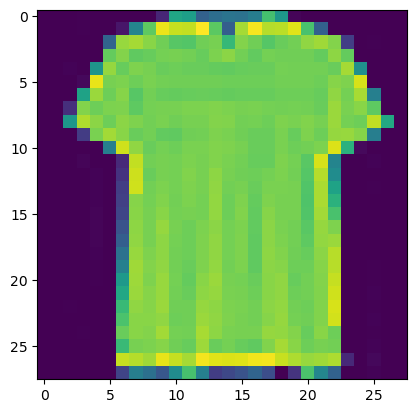

In [35]:
test()